<a href="https://colab.research.google.com/github/msaad1311/Machine-Translation-English-to-French/blob/master/Machine_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import collections
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import LSTM, GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional,Flatten
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
with open('/content/small_vocab_en', "r") as f:
        data = f.read()

english_sentences = data.split('\n')

with open('/content/small_vocab_fr', "r") as f:
        data = f.read()

french_sentences = data.split('\n')

In [17]:
len(english_sentences),len(french_sentences)

(137861, 137861)

In [18]:
for sample_i in range(2):
    print('small_vocab_en Line {}:  {}'.format(sample_i + 1, english_sentences[sample_i]))
    print('small_vocab_fr Line {}:  {}'.format(sample_i + 1, french_sentences[sample_i]))

small_vocab_en Line 1:  new jersey is sometimes quiet during autumn , and it is snowy in april .
small_vocab_fr Line 1:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
small_vocab_en Line 2:  the united states is usually chilly during july , and it is usually freezing in november .
small_vocab_fr Line 2:  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .


In [19]:
english_sentences=english_sentences[0:1000]
french_sentences=french_sentences[0:1000]
len(english_sentences),len(french_sentences)

(1000, 1000)

In [0]:
token_en = Tokenizer()
eng = token_en.fit_on_texts(english_sentences)
eng = token_en.texts_to_sequences(english_sentences)

In [22]:
maxi_en= len(max(eng,key=len))
print(maxi_en)

15


In [60]:
en_pad = pad_sequences(eng,maxlen=maxi_fr,truncating='post',padding='post')
print(en_pad[0:10])

[[15 16  1 10 23  4 41  7  3  1 46  2 54  0  0  0  0  0  0]
 [ 6 37 38  1  9 52  4 26  7  3  1  9 34  2 42  0  0  0  0]
 [20  1  9 23  4 59  7  3  1  9 27  2 48  0  0  0  0  0  0]
 [ 6 37 38  1 10 61  4 48  7  3  1 55  2 56  0  0  0  0  0]
 [47 11 14 13  1  6 80  5 39 11 14  1  6 93  0  0  0  0  0]
 [57 12 13  1  6 83  5 39 12  1  6 80  0  0  0  0  0  0  0]
 [17  1 66  4 62  5  3  1  9 52  2 26  0  0  0  0  0  0  0]
 [15 16  1 35  4 28  7  3  1  8 27  2 59  0  0  0  0  0  0]
 [31 11 14 13  1  6 81  5 39 11 14  1  6 80  0  0  0  0  0]
 [ 6 37 38  1 10 35  4 43  7  3  1 10 63  2 42  0  0  0  0]]


In [28]:
token_fr = Tokenizer()
fr = token_fr.fit_on_texts(french_sentences)
fr = token_fr.texts_to_sequences(french_sentences)
print(len(fr))

1000


In [29]:
maxi_fr = len(max(fr,key=len))
print(maxi_fr)

19


In [30]:
fr_pad = pad_sequences(fr,maxlen=maxi_fr,truncating='post',padding='post')
print(fr_pad[0:10])

[[ 28  26   1   9  54  34  11  22   6   3   1 116   2  55   0   0   0   0
    0]
 [  4  40  41   1  12  20   2  35   6   3  91  64   2  45   0   0   0   0
    0]
 [ 95   1  12  54   2  59   6   3   1  12  19   2  49   0   0   0   0   0
    0]
 [  4  40  41   1   9 204   2  49   6   3 100  20   2  56   0   0   0   0
    0]
 [ 52  13  15  17   1  10  79   5  43  13  15   1   7  96   0   0   0   0
    0]
 [ 24  17  16   1  81   5  43  16   1  10  79   0   0   0   0   0   0   0
    0]
 [ 25   1  65   2  60   5   3   1  12  20   2  35   0   0   0   0   0   0
    0]
 [ 28  26   1  53  14  36   6   3   1   8 119   2  59   0   0   0   0   0
    0]
 [ 48  17   1  13  15  10  80   5  43  13  15   1  10  79   0   0   0   0
    0]
 [  4  40  41   1   9  53   2  46   6   3   1   9  19   2  45   0   0   0
    0]]


In [32]:
vocab_en = len(token_en.word_index)
print(vocab_en)

vocab_fr = len(token_fr.word_index)
print(vocab_fr)

170
255


In [0]:
en_pad=np.array(en_pad)

In [0]:
en_pad=en_pad.reshape(en_pad.shape[0],en_pad.shape[1])

In [58]:
en_pad.shape

(1000, 15)

In [53]:
fr_pad=np.array(fr_pad)
fr_pad=fr_pad.reshape(fr_pad.shape[0],fr_pad.shape[1],1)
fr_pad.shape

(1000, 19, 1)

In [0]:
model1 = Sequential()
model1.add(Embedding(vocab_en+2,300,input_length=maxi_fr))
model1.add(GRU(64,activation='relu',return_sequences=True))
model1.add(TimeDistributed(Dense(vocab_fr+2)))

In [0]:
model1.compile(loss=sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [76]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 19, 300)           51600     
_________________________________________________________________
gru_7 (GRU)                  (None, 19, 64)            70080     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 19, 257)           16705     
Total params: 138,385
Trainable params: 138,385
Non-trainable params: 0
_________________________________________________________________


In [84]:
history=model1.fit(x=en_pad,y=fr_pad,epochs=50,validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 1s 987us/step - loss: 3.1655 - accuracy: 0.4830 - val_loss: 3.4296 - val_accuracy: 0.4863
Epoch 2/50
800/800 [==============================] - 1s 977us/step - loss: 3.4357 - accuracy: 0.4837 - val_loss: 3.3724 - val_accuracy: 0.4871
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 3.2715 - accuracy: 0.4812 - val_loss: 3.2622 - val_accuracy: 0.4811
Epoch 4/50
800/800 [==============================] - 1s 992us/step - loss: 3.1498 - accuracy: 0.4811 - val_loss: 3.2075 - val_accuracy: 0.4805
Epoch 5/50
800/800 [==============================] - 1s 986us/step - loss: 3.1179 - accuracy: 0.4832 - val_loss: 3.1308 - val_accuracy: 0.4824
Epoch 6/50
800/800 [==============================] - 1s 983us/step - loss: 3.1122 - accuracy: 0.4868 - val_loss: 3.3605 - val_accuracy: 0.4818
Epoch 7/50
800/800 [==============================] - 1s 984us/step - loss: 3.1975 - accurac

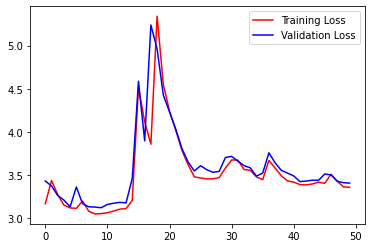

In [85]:
plt.plot(history.history['loss'],color='r',label='Training Loss')
plt.plot(history.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [98]:
model2 = Sequential()
model2.add(Embedding(vocab_en+2,300,input_length=maxi_fr))
model2.add(GRU(64,return_sequences=True))
model2.add(LSTM(64,return_sequences=True))
model2.add(TimeDistributed(Dense(vocab_fr+2)))

model2.compile(loss=sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 19, 300)           51600     
_________________________________________________________________
gru_16 (GRU)                 (None, 19, 64)            70080     
_________________________________________________________________
lstm_5 (LSTM)                (None, 19, 64)            33024     
_________________________________________________________________
time_distributed_8 (TimeDist (None, 19, 257)           16705     
Total params: 171,409
Trainable params: 171,409
Non-trainable params: 0
_________________________________________________________________


In [99]:
history1=model2.fit(x=en_pad,y=fr_pad,epochs=50,validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 2s 2ms/step - loss: 5.2447 - accuracy: 0.3433 - val_loss: 4.2064 - val_accuracy: 0.4168
Epoch 2/50
800/800 [==============================] - 1s 1ms/step - loss: 3.7345 - accuracy: 0.4089 - val_loss: 3.6230 - val_accuracy: 0.4097
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 3.4345 - accuracy: 0.4038 - val_loss: 3.7835 - val_accuracy: 0.3863
Epoch 4/50
800/800 [==============================] - 1s 1ms/step - loss: 3.6060 - accuracy: 0.3247 - val_loss: 3.6304 - val_accuracy: 0.3587
Epoch 5/50
800/800 [==============================] - 1s 1ms/step - loss: 3.2965 - accuracy: 0.3982 - val_loss: 3.3305 - val_accuracy: 0.4361
Epoch 6/50
800/800 [==============================] - 1s 1ms/step - loss: 3.0294 - accuracy: 0.4675 - val_loss: 3.0905 - val_accuracy: 0.4929
Epoch 7/50
800/800 [==============================] - 1s 1ms/step - loss: 2.8104 - accuracy: 0.4941 - 

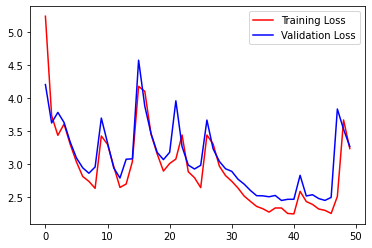

In [100]:
plt.plot(history1.history['loss'],color='r',label='Training Loss')
plt.plot(history1.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [109]:
model3 = Sequential()
model3.add(Embedding(vocab_en+2,300,input_length=maxi_fr))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(LSTM(64,return_sequences=True))
model3.add(Dense(vocab_fr+2))

model3.compile(loss=sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

model3.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 19, 300)           51600     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 19, 128)           186880    
_________________________________________________________________
lstm_13 (LSTM)               (None, 19, 64)            49408     
_________________________________________________________________
dense_12 (Dense)             (None, 19, 257)           16705     
Total params: 304,593
Trainable params: 304,593
Non-trainable params: 0
_________________________________________________________________


In [110]:
history2=model3.fit(x=en_pad,y=fr_pad,epochs=50,validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 3s 4ms/step - loss: 5.5469 - accuracy: 0.3719 - val_loss: 4.5120 - val_accuracy: 0.4279
Epoch 2/50
800/800 [==============================] - 2s 2ms/step - loss: 4.1136 - accuracy: 0.4202 - val_loss: 3.8919 - val_accuracy: 0.4345
Epoch 3/50
800/800 [==============================] - 2s 2ms/step - loss: 3.6349 - accuracy: 0.4182 - val_loss: 3.5498 - val_accuracy: 0.4226
Epoch 4/50
800/800 [==============================] - 2s 2ms/step - loss: 3.3302 - accuracy: 0.4272 - val_loss: 3.2719 - val_accuracy: 0.4555
Epoch 5/50
800/800 [==============================] - 2s 2ms/step - loss: 3.2530 - accuracy: 0.4253 - val_loss: 3.3220 - val_accuracy: 0.4179
Epoch 6/50
800/800 [==============================] - 2s 2ms/step - loss: 3.0317 - accuracy: 0.4612 - val_loss: 2.9355 - val_accuracy: 0.4992
Epoch 7/50
800/800 [==============================] - 2s 2ms/step - loss: 3.4557 - accuracy: 0.4247 - 

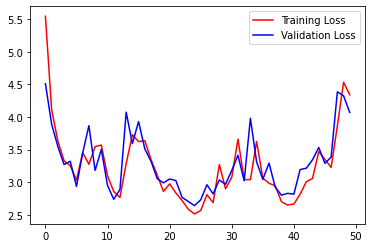

In [111]:
plt.plot(history2.history['loss'],color='r',label='Training Loss')
plt.plot(history2.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [0]:
#English Preprocessing

en_tlk = Tokenizer()
en_tlk.fit_on_texts(english_sentences)
entk = en_tlk.texts_to_sequences(english_sentences)
en_pad = pad_sequences(entk, maxlen=len(max(entk,key=len)), padding='post')

In [0]:
#French Preprocessing

fr_tlk = Tokenizer()
fr_tlk.fit_on_texts(french_sentences)
frtk=fr_tlk.texts_to_sequences(french_sentences)
fr_pad = pad_sequences(frtk,maxlen=len(max(frtk,key=len)),padding='post')

In [0]:
fr_pad = fr_pad.reshape(*fr_pad.shape, 1)

NameError: ignored

In [0]:
max_english_sequence_length = entk.shape[1]
max_french_sequence_length = frtk.shape[1]
english_vocab_size = len(entlk.word_index)
french_vocab_size = len(frtlk.word_index)

In [0]:
print(max_english_sequence_length)
print(max_french_sequence_length)
print(english_vocab_size)
print(french_vocab_size)